## Collect dataset

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
file = r'dataset\features\EURUSD.csv'
df = pd.read_csv(file)
df.set_index('date', inplace=True, drop=True)

## Features and Targets

In [2]:
features = df.copy()
features = features.drop(['open_24', 'close_24'], axis=1)
targets = df[['open_24', 'close_24']].copy()*10000


## Normalize data & Split data

In [3]:
import sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
sc_X = StandardScaler()
sc_y = StandardScaler()
x = sc_X.fit_transform(features.values)
y = sc_y.fit_transform(targets.values)


x_train, x_test, y_train, y_test = train_test_split(
    x, y, test_size=0.05)

y_train

array([[-0.90632596, -0.92497211],
       [ 1.51823629,  1.49777113],
       [-0.37564359, -0.37540562],
       ...,
       [-0.93372344, -0.93210934],
       [-0.29322091, -0.25867743],
       [-1.58090268, -1.58113653]])

In [4]:
from sklearn.feature_selection import SelectKBest,f_regression,chi2

def select_features(X_train, y_train, X_test):
	# configure to select all features
	fs = SelectKBest(score_func=f_regression, k='all')
	# learn relationship from training data
	fs.fit(X_train, y_train)
	# transform train input data
	X_train_fs = fs.transform(X_train)
	# transform test input data
	X_test_fs = fs.transform(X_test)
	return X_train_fs, X_test_fs, fs

open 0: 1919718.012732
high 1: 1946822.974860
low 2: 1974749.761995
close 3: 2008975.003157
volume 4: 148.286574
isFriday 5: 0.000276
isMonday 6: 0.082673
MOM_4 7: 29.790519
MOM_8 8: 60.682447
MOM_16 9: 116.680125
MOM_32 10: 220.839644
K_4 11: 95.635882
D_4 12: 113.240930
K_8 13: 142.031717
D_8 14: 155.535256
K_16 15: 214.073174
D_16 16: 224.029553
K_32 17: 297.737709
D_32 18: 302.439316
WILLR_4 19: 59.887394
WILLR_8 20: 110.617662
WILLR_16 21: 193.024266
WILLR_32 22: 285.117041
ROCP_4 23: 28.903471
ROCP_8 24: 58.997508
ROCP_16 25: 114.041180
ROCP_32 26: 217.264595
WPC 27: 2003892.399224
ADL 28: 1243.843032
ADOSC_4,14 29: 33.721360
ADOSC_8,18 30: 63.721018
ADOSC_16,26 31: 123.535688
ADOSC_32,42 32: 243.558812
CCI_4 33: 24.272055
CCI_8 34: 59.790570
CCI_16 35: 90.944551
CCI_32 36: 160.751063
HA_open 37: 1853700.016310
HA_high 38: 1921113.115442
HA_low 39: 1957177.536100
HA_close 40: 1987397.208301
MACD_1 41: 30.641854
MACDsignal_1 42: 35.414230
MACDhist_4 43: 0.000038
MACD_3 44: 80.1115

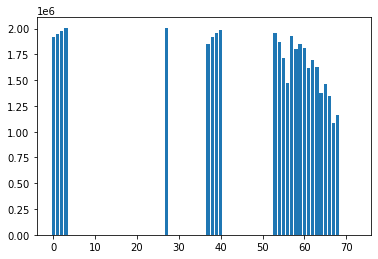

In [6]:
from matplotlib import pyplot

X_train_fs, X_test_fs, fs = select_features(x_train, y_train[:,0], x_test)
fea = features.columns.values
for i in range(len(fs.scores_)):
	if fs.scores_[i] > 10000:
		print('%s %d: %f' % (fea[i],i, fs.scores_[i]))
	
# plot the scores
pyplot.bar([i for i in range(len(fs.scores_))], fs.scores_)
pyplot.show()

In [7]:
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor()
model.fit(x_train, y_train)

importance = model.feature_importances_

for i,v in enumerate(importance):
	print('%s: , Score: %.5f' % (fea[i],v))
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()